In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [4]:
#For this model, we will be focusing on the defensive tackle position
dt = df[df['Position'] == 'DT']

In [5]:
dt.head()

,Unnamed: 0,Acceleration,Agility,Awareness,Ball Carrier Vision,Block Shedding,Carrying,Catch In Traffic,Catching,Elusiveness,...,Toughness,Trucking,Zone Coverage,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
2220,9,87,80,66,18,80,40,25,32,20,...,88,30,43,273.000000,35.000000,30.000000,126.000000,6.950000,4.280000,4.690000
2221,15,74,65,82,19,78,39,17,34,10,...,69,25,34,318.000000,28.651316,27.472222,104.905405,104.905405,4.660714,5.290000
2222,25,72,64,80,15,73,40,15,25,12,...,75,20,32,309.380435,28.651316,27.472222,104.905405,104.905405,4.660714,4.741034
2223,32,89,71,73,25,68,55,15,42,30,...,75,44,30,309.380435,28.651316,27.472222,104.905405,104.905405,4.660714,4.741034
2224,63,82,77,50,29,73,31,24,38,24,...,89,43,27,319.000000,28.500000,25.000000,108.000000,7.730000,4.650000,5.040000


In [6]:
dtcols = list(dt.columns.values)

In [7]:
print(dtcols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [9]:
#Removing non-numeric values
dt1 = dt[['Overall Rating','3Cone', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Bench', 'Block Shedding',
'Broad Jump', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power',
'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Pass Block', 'Play Action', 'Play Recognition',
'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Shuttle', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm',
'Strength', 'Tackle', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run',
'Toughness', 'Trucking']]

In [10]:
dt1.corr()

,Overall Rating,3Cone,Acceleration,Agility,Awareness,Ball Carrier Vision,Bench,Block Shedding,Broad Jump,Carrying,...,Stiff Arm,Strength,Tackle,Throw Accuracy Deep,Throw Accuracy Mid,Throw Accuracy Short,Throw Power,Throw on the Run,Toughness,Trucking
Overall Rating,1.000000,0.037013,0.130615,0.121051,0.895515,-0.011016,0.104515,0.443667,0.042791,0.147915,...,-0.135011,0.440697,0.564618,-0.015730,0.034187,0.040404,-0.010091,-0.073951,0.067999,-0.084285
3Cone,0.037013,1.000000,-0.282404,-0.191063,0.087080,-0.188702,0.016582,0.071548,-0.026738,0.138361,...,-0.207884,0.073829,-0.025877,0.035414,0.048018,0.046512,0.052228,0.051783,-0.017496,-0.162316
Acceleration,0.130615,-0.282404,1.000000,0.467200,-0.031635,0.291389,0.002840,-0.258521,0.261459,0.042615,...,0.204455,-0.151596,-0.032492,0.101916,0.044264,0.038735,-0.002277,0.111768,-0.013353,0.203592
Agility,0.121051,-0.191063,0.467200,1.000000,-0.028737,0.411467,-0.164194,-0.258176,0.274393,-0.087367,...,0.226437,-0.296897,-0.019660,0.061150,0.030197,0.030604,0.045715,0.055232,0.072785,0.229988
Awareness,0.895515,0.087080,-0.031635,-0.028737,1.000000,-0.120997,0.114471,0.312860,-0.066360,0.196649,...,-0.222807,0.303552,0.453667,-0.003096,0.051105,0.057097,0.025895,-0.072047,0.034973,-0.154711
Ball Carrier Vision,-0.011016,-0.188702,0.291389,0.411467,-0.120997,1.000000,-0.115950,-0.171307,0.033452,0.049073,...,0.670915,-0.132061,0.018717,0.166503,0.218988,0.227026,0.176592,0.084048,0.093419,0.634694
Bench,0.104515,0.016582,0.002840,-0.164194,0.114471,-0.115950,1.000000,0.000889,-0.018996,0.096279,...,-0.088298,0.376961,0.017307,0.076506,0.079306,0.083463,0.006233,-0.012688,-0.028187,-0.020827
Block Shedding,0.443667,0.071548,-0.258521,-0.258176,0.312860,-0.171307,0.000889,1.000000,-0.020075,0.044525,...,-0.203441,0.400162,0.536051,-0.055614,0.019576,0.023579,-0.093364,-0.089573,0.036908,-0.124065
Broad Jump,0.042791,-0.026738,0.261459,0.274393,-0.066360,0.033452,-0.018996,-0.020075,1.000000,-0.065817,...,-0.086090,-0.063478,-0.089257,0.012452,0.018177,0.027573,0.000791,0.012109,0.053921,-0.069350
Carrying,0.147915,0.138361,0.042615,-0.087367,0.196649,0.049073,0.096279,0.044525,-0.065817,1.000000,...,0.049455,0.046651,0.045444,0.197667,0.210145,0.202270,0.060868,0.160515,-0.049415,0.087800


In [11]:
dtcorr = dt.corr()

In [12]:
dtsigpos = dtcorr[dtcorr['Overall Rating'] >= 0.5]

In [14]:
#Here are our positive significant variables for the Defensive tackle Position
print(dtsigpos['Overall Rating'])

Awareness           0.895515
Overall Rating      1.000000
Play Recognition    0.873734
Pursuit             0.591877
Tackle              0.564618
Name: Overall Rating, dtype: float64


In [15]:
dtsigneg = dtcorr[dtcorr['Overall Rating'] <= -0.5]

In [16]:
#Looks like there aren't any significant negative variables
print(dtsigneg)

Empty DataFrame
Columns: [Unnamed: 0, Acceleration, Agility, Awareness, Ball Carrier Vision, Block Shedding, Carrying, Catch In Traffic, Catching, Elusiveness, Finesse Moves, Hit Power, Impact Blocking, Injury, Juke Move, Jumping, Man Coverage, Overall Rating, Pass Block, Play Action, Play Recognition, Power Moves, Press, Pursuit, Release, Route Running, Run Block, Spectacular Catch, Speed, Spin Move, Stamina, Stiff Arm, Strength, Tackle, Throw Accuracy Deep, Throw Accuracy Mid, Throw Accuracy Short, Throw Power, Throw on the Run, Toughness, Trucking, Zone Coverage, Wt, Vertical, Bench, Broad Jump, 3Cone, Shuttle, 40yd]
Index: []

[0 rows x 49 columns]


In [18]:
#Let's start with some vif testing so we can remove values that are highly correlated with each other'
dtsig = dt[['Awareness', 'Play Recognition', 'Pursuit', 'Tackle']]
X = add_constant(dtsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#It looks like the first variable we will remove will be play recognition

const               319.673644
Awareness            12.145819
Play Recognition     12.429589
Pursuit               1.493767
Tackle                1.399278
dtype: float64

In [20]:
dtsig2 = dt[['Awareness', 'Pursuit', 'Tackle']]
X = add_constant(dtsig2)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our VIF scores are below 5, we can move on to statistical summary testing

const        311.722344
Awareness      1.447101
Pursuit        1.469312
Tackle         1.395344
dtype: float64

In [21]:
DT = sm.OLS(dt['Overall Rating'], dtsig2).fit()
print(DT.summary())
#It looks like all of our variables are significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.517e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          1.26e-313
Time:                        00:06:03   Log-Likelihood:                -569.19
No. Observations:                 229   AIC:                             1144.
Df Residuals:                     226   BIC:                             1155.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.4257      0.018     23.905      0.0

In [22]:
def model():
    pv= 0.4257*dt['Awareness']+ 0.2553*dt['Pursuit']+ 0.2858*dt['Tackle']
    return pv

In [24]:
dt['Predicted Value'] = model()
dt['Residual'] = dt['Predicted Value'] - dt['Overall Rating']

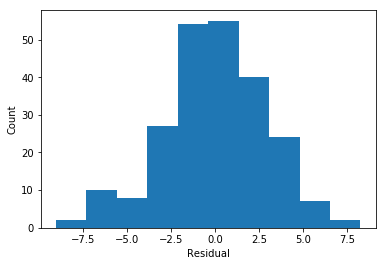

In [25]:
plt.hist(dt['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

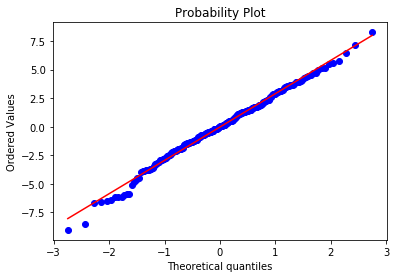

In [26]:
stats.probplot(dt['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

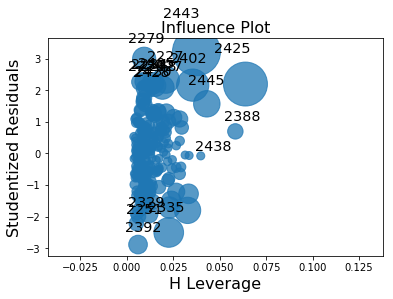

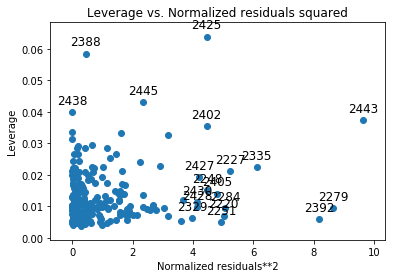

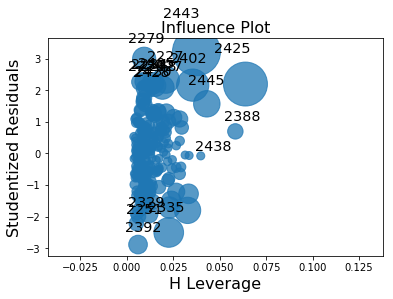

In [28]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(DT)
influence_plot(DT)
#There are some high residual, low leverage and some high leverage low residuals but no high leverage, high residuals so we will
#leave the data as it is

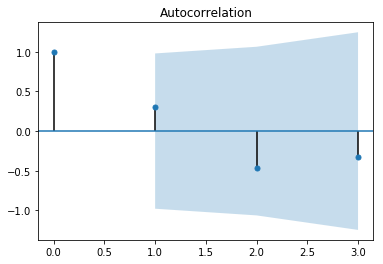

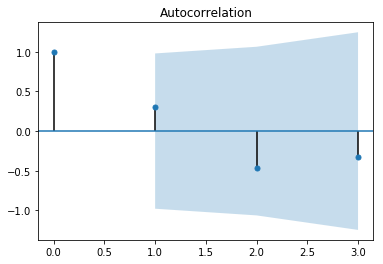

In [30]:
dtcorr1 = dt[['Overall Rating', 'Awareness', 'Pursuit', 'Tackle']].corr()
plot_acf(dtcorr1['Overall Rating'])
#there does not appear to be any autocorrelation looking at the plot below
#There is also a Durbin-Watson correlation of 1.816, which indicates no significant autocorrelation

In [31]:
#Finally, we check for homoskedasticity
het_breuschpagan(dt['Residual'], dtsig2)
#Due to the low p-values, we can reject the null that there is homoskedasticity in the data

(70.91319066553103,
 3.993891844525916e-16,
 33.79236416135248,
 4.404131970589496e-18)

In [33]:
###This model looks like it has the right variables in it.  Let's move on to the testing phase!
X_train, X_test, y_train, y_test = train_test_split(dtsig2, dt['Overall Rating'], test_size = 0.3, random_state =42)
reg = LinearRegression()
reg.fit(X_train, y_train)
dtcv = cross_val_score(reg, dtsig2, dt['Overall Rating'], cv = 5)
dtcv_mean = np.mean(dtcv)
print(dtcv, dtcv_mean)

[0.88741963 0.84631498 0.7997955  0.87362857 0.59130063] 0.7996918626087168


In [36]:
dtdesc= dt[['Overall Rating', 'Awareness', 'Pursuit', 'Tackle', 'Predicted Value', 'Residual']]
dtdesc1 = dtdesc.describe()
dtdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\dtdesc1.csv')

In [12]:
dtdesc= dt[['Overall Rating','Awareness', 'Pursuit', 'Tackle',
           '3AVG Play Recognition',
           '4AVG Catch in Traffic', 'Predicted Value', 'Residuals']]
dtdesc1 = dtdesc.describe()
dtdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\dtdesc1.csv')

In [11]:
dtdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\dtsig.csv')

NameError: name 'dtsig' is not defined

In [ ]:
dtsig9 = dt[['Awareness', 'Pursuit', 'Tackle',
           '3AVG Play Recognition',
           '4AVG Catch in Traffic']]